# Lab B 
By Simon Van Norden and Nicolas Harvie 

## The Data Set

For the problem set, you'll use [Robert Shiller's long data set on US stocks](http://www.econ.yale.edu/~shiller/data/ie_data.xls), which has monthly data from the beginning of 1871 to the end of 2021. You'll work with the S&P Composite Price ($P$) and Dividend ($D$) indices.

---

## Time Series in `statsmodels`

`statsmodels` has many different features for working with AR and VAR models. <br>Most may be found in the [Time Series Analysis section of the `statsmodels` User Guide](https://www.statsmodels.org/stable/tsa.html).<br> The main exception is the material on VAR models, which is in [its own section](https://www.statsmodels.org/stable/vector_ar.html). 

**When all else fails, _READ THE MANUAL_.**

---

## `statsmodels.stattools` utilities for Time Series

`statsmodels.stattools` has some useful function for modeling Time Series, such as 

- [acf:](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf) for calculating autocorrelation functions
- [qstat:](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.q_stat.html#statsmodels.tsa.stattools.q_stat) for calculating the Ljung-Box Q Statistic (designed to be used with acf())
- [grangercausalitytests:](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html#statsmodels.tsa.stattools.grangercausalitytests) ....can you guess what it does?

Let's see some simple examples with last week's data set.

## Autocorrelation Functions

In [1]:
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt

RawData = pd.read_excel('../data/PSet_1_H2022.xlsx',index_col=0)
RawData

# import acf()
from statsmodels.tsa.api import stattools as stl

stl.acf(RawData.SP500)

array([ 1.        ,  0.07262896, -0.0770517 ,  0.06022046,  0.06249856,
        0.01218617, -0.05858103,  0.08439023,  0.06912256, -0.11049807,
       -0.02292213,  0.04287961,  0.05048913, -0.06160226, -0.0525184 ,
        0.08931378,  0.05370541, -0.04021329,  0.00509516,  0.08318852,
       -0.10259685, -0.04669955, -0.06911144,  0.03313828,  0.02308621])

In [3]:
Image(url="../slide_images/ACF.png", width=700, height=500)

[Autocorrelation Functions Documentation](https://www.statsmodels.org/stable/api.html)

In [4]:
# ... but if we only care about the first 5 lags....
stl.acf(RawData.SP500,nlags=5)

array([ 1.        ,  0.07262896, -0.0770517 ,  0.06022046,  0.06249856,
        0.01218617])

In [5]:
# Let's see 97% confidence intervals for those estimates
stl.acf(RawData.SP500,nlags=5,alpha=0.03)

(array([ 1.        ,  0.07262896, -0.0770517 ,  0.06022046,  0.06249856,
         0.01218617]),
 array([[ 1.        ,  1.        ],
        [-0.06407389,  0.2093318 ],
        [-0.21447376,  0.06037035],
        [-0.07800659,  0.19844751],
        [-0.07621791,  0.20121503],
        [-0.12705553,  0.15142786]]))

We can see that there is an impressively wide distribution of possible values given the confidence interval! What could that mean?

In [6]:
# What about testing the joint hypothesis that all the autocorrelations are 0?
# Documentation is your friend ! 
stl.acf(RawData.SP500,nlags=5,alpha=0.03,qstat=True)

(array([ 1.        ,  0.07262896, -0.0770517 ,  0.06022046,  0.06249856,
         0.01218617]),
 array([[ 1.        ,  1.        ],
        [-0.06407389,  0.2093318 ],
        [-0.21447376,  0.06037035],
        [-0.07800659,  0.19844751],
        [-0.07621791,  0.20121503],
        [-0.12705553,  0.15142786]]),
 array([1.34517922, 2.86523224, 3.79746229, 4.8056063 , 4.84408954]),
 array([0.24612266, 0.23868368, 0.28418145, 0.30783123, 0.43520269]))

In [7]:
Image(url="../slide_images/ACF_returns.png", width=700, height=400)

In [8]:
Image(url="../slide_images/LB_test.png", width=700, height=400)

In [9]:
Image(url="../slide_images/LB_WIKI.png", width=900, height=600)

In [10]:
# Let's label all that nicely.....

autocorrel, CI97, LBQstat, LBpVal = stl.acf(RawData.SP500,nlags=5,alpha=0.03,qstat=True)

acfHat = pd.DataFrame(np.vstack((CI97[:,0],autocorrel,CI97[:,1])).T,
                      columns=['Lower','rho','Upper'])
print(acfHat)
QStats = pd.DataFrame(np.vstack((LBQstat,LBpVal)).T,columns=['Q-Stat.','P-value'])
QStats

      Lower       rho     Upper
0  1.000000  1.000000  1.000000
1 -0.064074  0.072629  0.209332
2 -0.214474 -0.077052  0.060370
3 -0.078007  0.060220  0.198448
4 -0.076218  0.062499  0.201215
5 -0.127056  0.012186  0.151428


,Q-Stat.,P-value
0,1.345179,0.246123
1,2.865232,0.238684
2,3.797462,0.284181
3,4.805606,0.307831
4,4.844090,0.435203


### Useful tips 

`statsmodels` also has a few useful tools in TSA Tools, like

- [lagmat()](https://www.statsmodels.org/stable/generated/statsmodels.tsa.tsatools.lagmat.html#statsmodels.tsa.tsatools.lagmat)
- [lagmat2ds()](https://www.statsmodels.org/stable/generated/statsmodels.tsa.tsatools.lagmat2ds.html#statsmodels.tsa.tsatools.lagmat2ds)

In [11]:
import statsmodels.api as sm
# Importing our datasets
data = sm.datasets.macrodata.load()
data = data.data[['year','quarter','realgdp','cpi']]
print(data)

       year  quarter    realgdp      cpi
0    1959.0      1.0   2710.349   28.980
1    1959.0      2.0   2778.801   29.150
2    1959.0      3.0   2775.488   29.350
3    1959.0      4.0   2785.204   29.370
4    1960.0      1.0   2847.699   29.540
..      ...      ...        ...      ...
198  2008.0      3.0  13324.600  216.889
199  2008.0      4.0  13141.920  212.174
200  2009.0      1.0  12925.410  212.671
201  2009.0      2.0  12901.504  214.469
202  2009.0      3.0  12990.341  216.385

[203 rows x 4 columns]


In [12]:
# Rather than using .shift()
sm.tsa.lagmat(data, maxlag=2, use_pandas=True)

,year.L.1,quarter.L.1,realgdp.L.1,cpi.L.1,year.L.2,quarter.L.2,realgdp.L.2,cpi.L.2
0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000
1,1959.0,1.0,2710.349,28.980,0.0,0.0,0.000,0.000
2,1959.0,2.0,2778.801,29.150,1959.0,1.0,2710.349,28.980
3,1959.0,3.0,2775.488,29.350,1959.0,2.0,2778.801,29.150
4,1959.0,4.0,2785.204,29.370,1959.0,3.0,2775.488,29.350
...,...,...,...,...,...,...,...,...
198,2008.0,2.0,13415.266,218.610,2008.0,1.0,13366.865,213.997
199,2008.0,3.0,13324.600,216.889,2008.0,2.0,13415.266,218.610
200,2008.0,4.0,13141.920,212.174,2008.0,3.0,13324.600,216.889
201,2009.0,1.0,12925.410,212.671,2008.0,4.0,13141.920,212.174


In [13]:
# lagmat2ds is very similar
sm.tsa.lagmat2ds(data, maxlag0=2, use_pandas=True)

,year,year.L.1,year.L.2,quarter,quarter.L.1,quarter.L.2,realgdp,realgdp.L.1,realgdp.L.2,cpi,cpi.L.1,cpi.L.2
0,1959.0,0.0,0.0,1.0,0.0,0.0,2710.349,0.000,0.000,28.980,0.000,0.000
1,1959.0,1959.0,0.0,2.0,1.0,0.0,2778.801,2710.349,0.000,29.150,28.980,0.000
2,1959.0,1959.0,1959.0,3.0,2.0,1.0,2775.488,2778.801,2710.349,29.350,29.150,28.980
3,1959.0,1959.0,1959.0,4.0,3.0,2.0,2785.204,2775.488,2778.801,29.370,29.350,29.150
4,1960.0,1959.0,1959.0,1.0,4.0,3.0,2847.699,2785.204,2775.488,29.540,29.370,29.350
...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,2008.0,2008.0,3.0,2.0,1.0,13324.600,13415.266,13366.865,216.889,218.610,213.997
199,2008.0,2008.0,2008.0,4.0,3.0,2.0,13141.920,13324.600,13415.266,212.174,216.889,218.610
200,2009.0,2008.0,2008.0,1.0,4.0,3.0,12925.410,13141.920,13324.600,212.671,212.174,216.889
201,2009.0,2009.0,2008.0,2.0,1.0,4.0,12901.504,12925.410,13141.920,214.469,212.671,212.174


---

## AR Models

`statsmodels` estimates both AR models (which you saw in Lecture 4) <br>and ARMA & ARIMA Models (which we have *not* talked about.) 

To work with AR models, you need to know

- `ar_select_order()`
- `AutoReg`

Let's see an example with the PSet 1 data. 

### Choosing the amount of lags

In [14]:
# import all the tsa functions for AR models
import statsmodels.tsa.ar_model as sma

MyLags = sma.ar_select_order(RawData.Inflation_CPI,maxlag=12,ic='hqic',period=12) # can set ic = aic, bic or hqic
print(f'AR Lags for Inflation: {MyLags.ar_lags}')

MyLags = sma.ar_select_order(RawData.SP500,maxlag=12,ic='hqic') # can set ic = aic, bic or hqic
print(f'AR Lags for S&P500: {MyLags.ar_lags}')

AR Lags for Inflation: [1, 2]
AR Lags for S&P500: None


/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, b

### Autoregressive Object

/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:          Inflation_CPI   No. Observations:                  252
Model:                     AutoReg(2)   Log Likelihood                1087.686
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Wed, 26 Jul 2023   AIC                          -2167.372
Time:                        11:01:37   BIC                          -2153.286
Sample:                             2   HQIC                         -2161.703
                                  252                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0011      0.000      4.985      0.000       0.001       0.002
Inflation_CPI.L1     0.6611      0.061     10.857      0.000       0.542       0.780
Inflation_CPI.L2    -0.2698      0.061     -4.437      0.000      -0.389      -0.151
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2252           -1.4850j            1.9252           -0.1402
AR.2            1.2252           +1.4850j            1.9252            0.1402
-----------------------------------------------------------------------------
"""

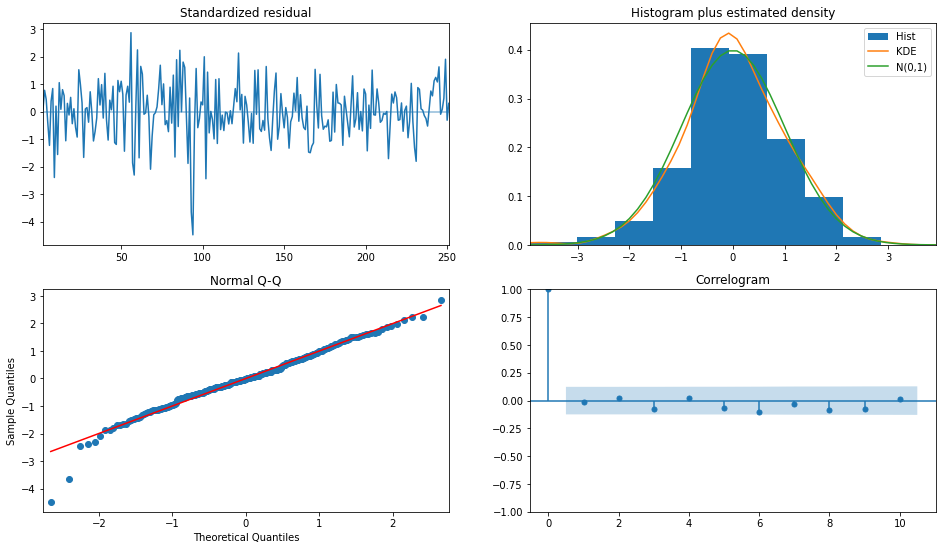

In [15]:
from statsmodels.tsa.ar_model import AutoReg

# Now let's estimate a model
ARresults = AutoReg(RawData.Inflation_CPI, lags=2).fit() # using the lags we found precedently 
# get some diagnostics
ARresults.plot_diagnostics(figsize=[16,9])
# see the model estimates
ARresults.summary()


**Reminder:** For a *results class* (like `AutoRegResults`) the statsmodels documentation lists *parameters*, *attributes*, *methods* and *properties*. 
- *attributes* are elements of the object that we can access
- *methods* are functions that may be applied to the object (functions which will have their own descriptions and parameters.)

We saw two of them above. Now here's two more.... 

### Prediction with AR Models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The Dynamic forecast has an increasing forecast horizon.


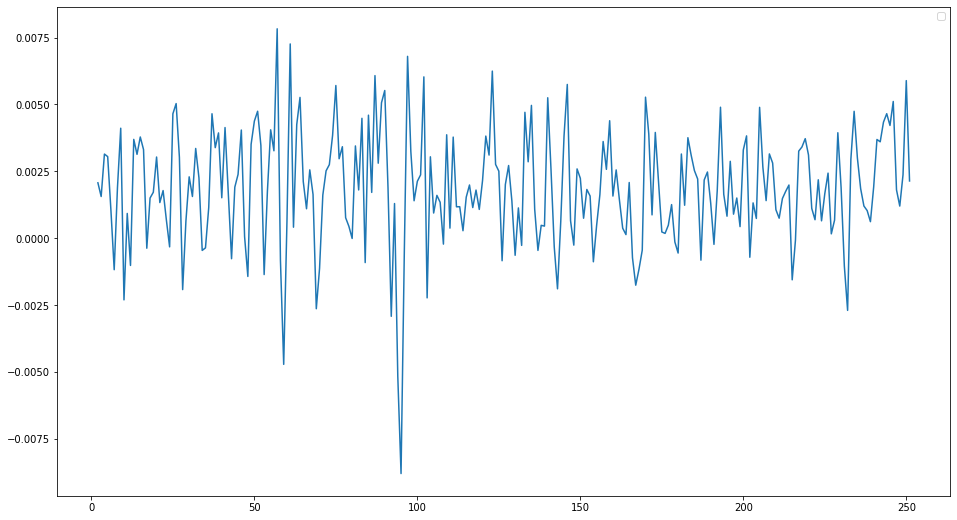

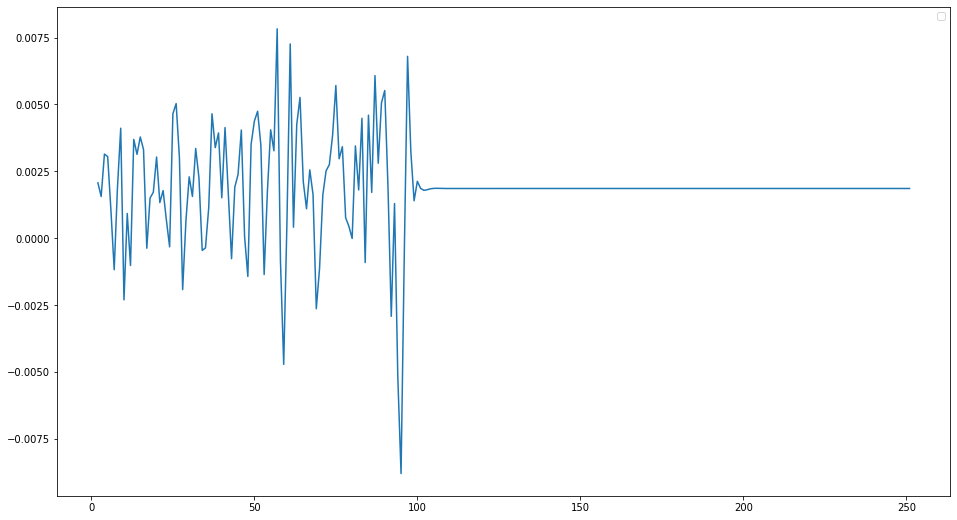

In [16]:
# get some fitted values
fg_static = ARresults.plot_predict(figsize=[16,9])
# But those were from a static forecast (i.e. a 1-period ahead forecast.)
# Let's see a dynamic forecast starting from observation 100
fg_dynamic = ARresults.plot_predict(dynamic=100,figsize=[16,9])

fg_static

fg_dynamic
print('The Dynamic forecast has an increasing forecast horizon.')

In [17]:
ARresults.nobs

250

In [18]:
ARresults.ar_lags

[1, 2]

In [19]:
# Length for our forecasting 
length = 3
# This corresponds to the length of the AR Model
y_len = ARresults.nobs + len(ARresults.ar_lags)
# This refers to the prediction for length amount of observations 
forecast = ARresults.predict(start= y_len, end= (y_len + length - 1))
forecast

/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


252    0.001834
253    0.001512
254    0.001633
dtype: float64

### Rolling AR

In [20]:
Image(url="../slide_images/rolling1.png", width=700, height=500)

In [21]:
Image(url="../slide_images/rolling2.png", width=700, height=500)

In [22]:
Image(url="../slide_images/rolling3.png", width=700, height=500)

In [23]:
series = RawData.SP500
estimation_window = 100

df_2lags = pd.DataFrame(index= range(len(RawData.SP500) - estimation_window), columns=range(1,length+1))

for i in range(len(series) - estimation_window):
    model = AutoReg(series[i:(estimation_window + i)], lags=2).fit()
    df_2lags.iloc[i] = model.predict(start= estimation_window, end=(estimation_window+length-1))

/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction resul

In [24]:
# Here the rows refer to the last observation after the estimation window 
# The columns refer to the forecasted observation 
df_2lags


,1,2,3
0,0.008495,-0.015918,-0.006504
1,-0.000064,-0.008545,-0.002052
2,-0.006813,-0.002814,-0.000463
3,0.02238,-0.001431,-0.002473
4,0.003156,-0.001996,-0.000091
...,...,...,...
147,0.00887,0.01094,0.013613
148,0.008422,0.010296,0.014229
149,0.016823,0.023108,0.009912
150,0.016144,0.001154,0.014171


### Forecast Accuracy

In [25]:
Image(url="../slide_images/forecast1.png", width=700, height=500)

In [26]:
array_2lags = df_2lags.to_numpy(dtype='float')
array_2lags[0]

array([ 0.00849457, -0.01591804, -0.0065042 ])

In [27]:
df_4lags = pd.DataFrame(index= range(len(RawData.SP500) - estimation_window), columns=range(1,length+1))

for i in range(len(series) - estimation_window):
    model = AutoReg(series[i:(estimation_window + i)], lags=4).fit()
    df_4lags.iloc[i] = model.predict(start= estimation_window, end=(estimation_window+length-1))

array_4lags = df_4lags.to_numpy(dtype='float')

/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction resul

In [28]:
array_4lags[0]

array([-0.00842736, -0.00991445,  0.01546165])

In [29]:
# A quick Verification 
array_2lags.shape , array_4lags.shape

((152, 3), (152, 3))

In [30]:
# Actual Observations 
actual_df = pd.DataFrame(index= range(len(series) - estimation_window - length), columns=range(length)).astype('float')

for i in range(len(series) - estimation_window - length):
    actual_df.iloc[i] = series[estimation_window+i:(estimation_window + length + i)]

array_actual = actual_df.to_numpy(dtype='float')

In [31]:
MSFE_AR2 = (array_2lags[:-length, :] - array_actual)**2
MSFE_AR4 = (array_4lags[:-length, :] - array_actual)**2
d = MSFE_AR4 - MSFE_AR2


In [32]:
d = pd.DataFrame(d)
d

,0,1,2
0,0.001848,-0.000185,-0.003075
1,0.000067,-0.002359,-0.000658
2,-0.001655,-0.000734,-0.000269
3,-0.000153,-0.000358,0.000408
4,-0.000136,0.000440,-0.001449
...,...,...,...
144,0.000031,0.000265,0.000140
145,0.000304,0.000179,0.000039
146,0.000242,0.000115,0.000205
147,0.000215,-0.000029,0.000153


In [33]:
def DM_statistic(d, h):
    """
    Compute the Harvey, Leybourne and Newbold (1997) Modified-Diebold-Mariano statistic and its p-value
    """
    tau = d.shape[0]
    d_bar = d.mean()
    sigma_d = np.sum(d*d)
    if h > 1:
        for j in range(h-1):
            sigma_d += 2 * np.sum(d[1+j:]*d[:tau-j-1])
    sigma_d = np.sqrt((sigma_d/tau))
    DM = d_bar/sigma_d
    return DM

In [34]:
from scipy import stats

dm_df = pd.DataFrame(index=['DM', 'pval'], columns=range(d.shape[1])).astype('float')

for i in range(d.shape[1]):
    dm_df.iloc[0,i] = DM_statistic(d.iloc[:,i],i+1)


dm_df.iloc[1] = 2*stats.norm.cdf(-abs(dm_df.iloc[0]))

dm_df.T

,DM,pval
0,0.039619,0.968397
1,0.031801,0.974631
2,0.037455,0.970122


In [35]:
d.shape[0]

149

### Forecast Encompassing

In the Problem Set, you will have to modify the DM test according to the Harvey, Leybourne and Newbold (1997) adjustment. </br>

Here is a review of the theory, I will leave the code to you!

In [36]:
Image(url="../slide_images/Encompassing1.png", width=700, height=500)

In [37]:
Image(url="../slide_images/Encompassing2.png", width=700, height=500)

In [38]:
Image(url="../slide_images/Encompassing3.png", width=700, height=500)

### Simulation

In [39]:
series = RawData.SP500
series

Date
2001-01-31    0.032375
2001-02-28   -0.090952
2001-03-30   -0.063706
2001-04-30    0.077825
2001-05-31    0.006870
                ...   
2021-08-31    0.030600
2021-09-30   -0.046076
2021-10-29    0.070510
2021-11-30   -0.007256
2021-12-31    0.043485
Name: SP500, Length: 252, dtype: float64

In [40]:
#  Creating our Simulated Model
simulation_model = AutoReg(series, 2).fit()
phi = simulation_model.params
e_hat = simulation_model.resid
phi, np.array(e_hat)[0:3]

/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(const       0.008061
 SP500.L1    0.084413
 SP500.L2   -0.083537
 dtype: float64,
 array([-0.06138461,  0.06754393, -0.01308213]))

In [41]:
# Our simulation 
bg = np.random.default_rng()
series_simulated = series.copy()

simulation = np.empty(3)

for j in range(3):
    simulation[j] = phi[0] + np.dot(series_simulated[-2:],np.flip(phi[1:])) + bg.choice(e_hat) # choice is the element of random sampling 
    series_simulated = np.append(series_simulated[1:],simulation[j]) # dropping the first observation 

In [42]:
simulation

array([-0.01430764,  0.06343671, -0.01308957])

In [43]:
series_simulated[-3:]

array([-0.01430764,  0.06343671, -0.01308957])

In the Problem Set 2, you will have to generate multiple such forecasts and provide confidence intervals for the forecasted values

---

## VARs in `statsmodels`

`statsmodels` has an extensive discussion of [how to work with VARs](https://www.statsmodels.org/stable/vector_ar.html). They show


*   How to define a VAR model with `VAR(data)`
*   How to estimate it with `.fit()`
*   How to see results with `.summary()`
*   How to choose the lag length with `.fit(maxlags= , ic= )`
*   How to create forecasts with `.forecast()`
*   How to create IRFs with `.IRF()`

You can also see what can be retrieved from the model results [here.](https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html#statsmodels.tsa.vector_ar.var_model.VARResults). The list includes

- `.cov_params()` : the VCV of the estimated parameters
- `.forecast()` : create forecasts for the given number of steps
- `.forecast_cov()` : the VCV for the forecasts
- `.irf()` : compute the IRFs
- `.plot_forecast()` 
- `.testcausality()` : test for Granger-Causality


In [44]:
Image(url="../slide_images/VAR_1.png", width=700, height=500)

In [45]:
PSet1data = pd.read_excel('../data/PSet1A2021.xlsx',index_col=0)
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

### Determining the optimal number of lags

In [46]:
Image(url="../slide_images/IC.png", width=700, height=500)

In [47]:
maxlags= [i for i in range(1,10)]

df_lags = pd.DataFrame(index=maxlags, columns=['BIC'])

for i in maxlags:
    df_lags.loc[i, 'BIC'] = VAR(PSet1data).fit(i, ic='bic').k_ar

/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, b

In [48]:
df_lags

,BIC
1,1
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


### Prediction

In [49]:
# Estimate a VAR with all the variables and 2 lags & a constant
VARexample = VAR(PSet1data.dropna()).fit(2)

/Users/nicolasharvie/opt/anaconda3/envs/ap/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
# VARexample is a VARResults object
# It has attributes that include the names of the variables, the trend and the parameters.
print(VARexample.names)
print(VARexample.trend)
print(VARexample.params)
# Note that for attributes, we need not include the () !

['RETDVW', 'CAPE', 'GS10', 'Riskfree', 'Inflation']
c
                RETDVW      CAPE      GS10  Riskfree  Inflation
const         0.022110 -0.090997  0.062248 -0.034563   0.019246
L1.RETDVW     0.074238  8.036551  0.216879  0.440795   0.038644
L1.CAPE      -0.003422  0.911692  0.013155 -0.008291   0.001699
L1.GS10      -0.015183  0.065463  1.176821  0.136721   0.010299
L1.Riskfree  -0.001186  0.097785  0.124159  1.072647   0.004526
L1.Inflation -0.028733 -0.645744  0.177910 -0.011940   0.354407
L2.RETDVW    -0.005618  7.596135  0.165068  0.670525   0.084015
L2.CAPE       0.002863  0.088068 -0.014344  0.008740  -0.002172
L2.GS10       0.014463 -0.067255 -0.199382 -0.114502  -0.012311
L2.Riskfree   0.001748 -0.094332 -0.106752 -0.100720  -0.000383
L2.Inflation -0.015042 -0.495776 -0.031012  0.051796   0.124620


array([7.75052062e-03, 2.24652460e+01, 3.71586418e+00, 2.40897879e+00,
       2.31551156e-02])

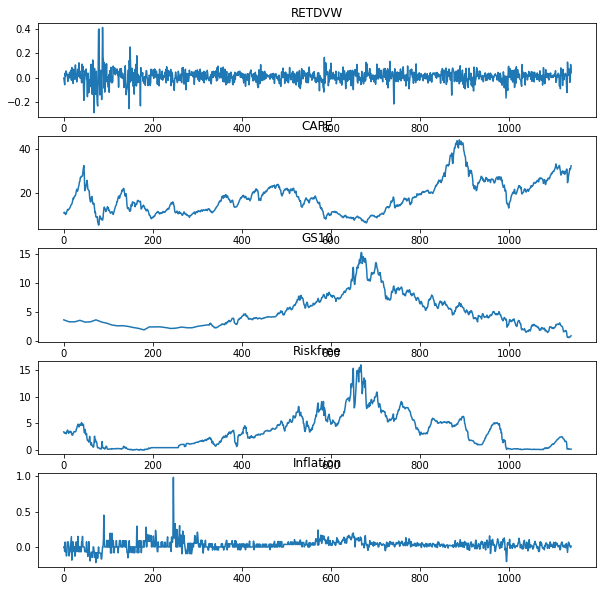

In [51]:
# It also has methods that include plot() and mean()
VARexample.plot()
VARexample.mean()
# Note that to call methods, we need to include the () !

In [52]:
# It also has properties like the t-statistics and p-values of the estimated parameters
VARexample.tvalues

,RETDVW,CAPE,GS10,Riskfree,Inflation
const,3.271620,-1.395921,2.399384,-0.686428,2.580043
L1.RETDVW,2.490992,27.956125,1.895690,1.985173,1.174723
L1.CAPE,-1.366566,37.749317,1.368646,-0.444432,0.614739
L1.GS10,-1.793573,0.801694,36.213140,2.167713,1.102191
L1.Riskfree,-0.259499,2.218000,7.076399,31.499399,0.897040
L1.Inflation,-1.074529,-2.503581,1.733185,-0.059932,12.007554
L2.RETDVW,-0.153292,21.487284,1.173258,2.455603,2.076808
L2.CAPE,1.139447,3.634018,-1.487223,0.466909,-0.783326
L2.GS10,1.741654,-0.839625,-6.254444,-1.850673,-1.343118
L2.Riskfree,0.380391,-2.128616,-6.052840,-2.942459,-0.075603


In [53]:
# It also has properties like the t-statistics and p-values of the estimated parameters
VARexample.pvalues

,RETDVW,CAPE,GS10,Riskfree,Inflation
const,0.001069,1.627384e-01,1.642266e-02,4.924431e-01,9.878789e-03
L1.RETDVW,0.012739,5.553672e-172,5.800102e-02,4.712523e-02,2.401055e-01
L1.CAPE,0.171761,0.000000e+00,1.711099e-01,6.567305e-01,5.387269e-01
L1.GS10,0.072881,4.227298e-01,3.781817e-287,3.018056e-02,2.703786e-01
L1.Riskfree,0.795250,2.655482e-02,1.479480e-12,8.852693e-218,3.696976e-01
L1.Inflation,0.282585,1.229434e-02,8.306276e-02,9.522098e-01,3.242970e-33
L2.RETDVW,0.878168,2.047448e-102,2.406922e-01,1.406484e-02,3.781931e-02
L2.CAPE,0.254517,2.790409e-04,1.369559e-01,6.405651e-01,4.334358e-01
L2.GS10,0.081569,4.011187e-01,3.989349e-10,6.421654e-02,1.792336e-01
L2.Riskfree,0.703655,3.328600e-02,1.423144e-09,3.256167e-03,9.397352e-01


### Granger Causality

In [54]:
Image(url="../slide_images/GC1.png", width=600, height=500)

In [55]:
Image(url="../slide_images/VAR_equation.png", width=1000, height=100)

In [56]:
# Here are the variables we will require
VARexample.names

['RETDVW', 'CAPE', 'GS10', 'Riskfree', 'Inflation']

In [57]:
# Not so elegant syntax to Granger test our variables 
granger_df = pd.DataFrame(index=VARexample.names, columns=VARexample.names)
for factor1 in granger_df.columns:
    for factor2 in granger_df.index:
        result = VARexample.test_causality(caused=factor1, causing=factor2)
        granger_df.loc[factor1, factor2] = result.pvalue

In [58]:
granger_df

,RETDVW,CAPE,GS10,Riskfree,Inflation
RETDVW,0.044987,0.020033,0.199454,0.883341,0.305664
CAPE,0.0,0.0,0.698485,0.085302,0.000232
GS10,0.06953,0.153632,0.0,0.0,0.200961
Riskfree,0.004622,0.874021,0.034899,0.0,0.965621
Inflation,0.047577,0.139907,0.219546,0.032666,0.0


In [59]:
# A little tip for you to access objects' attributes 
np.array(dir(result))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__',
       '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__',
       '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__',
       '__repr__', '__setattr__', '__sizeof__', '__str__',
       '__subclasshook__', '__weakref__', 'caused', 'causing',
       'conclusion', 'conclusion_str', 'crit_value', 'df', 'h0', 'method',
       'pvalue', 'signif', 'signif_str', 'summary', 'test',
       'test_statistic', 'title'], dtype='<U17')